# Calcium Dilution and Equilibrium Potential

The goal of this project is to determine how changes in extracellular calcium concentration change the electromotive force of calcium.

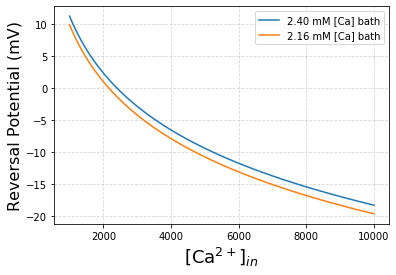

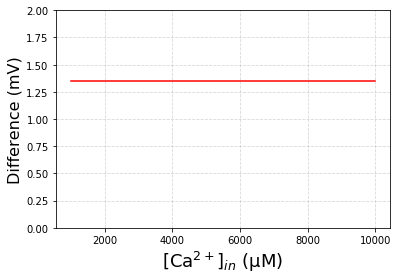

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def getReversalPotential(charge, concInside, concOutside, temperatureC=25):
    """Retern the Nernst equilibrium potential (in mV) for the given ion"""
    temperatureK = temperatureC + 273.15
    R = 8.31446261815324
    F = 96485.33212
    E = (R * temperatureK) / (charge * F) * np.log(concOutside / concInside);
    return E * 1e3

pointCount = 100
insideConcentrations = np.linspace(1, 10, pointCount)
outsideConcentrationsControl = np.full(pointCount, 2.40)
outsideConcentrationsDiluted = np.full(pointCount, 2.16)
potentialsControl = np.empty(pointCount)
potentialsDiluted = np.empty(pointCount)
for i in range(pointCount):
    potentialsControl[i] = getReversalPotential(+2, insideConcentrations[i], outsideConcentrationsControl[i])
    potentialsDiluted[i] = getReversalPotential(+2, insideConcentrations[i], outsideConcentrationsDiluted[i])
potentialsDiff = potentialsControl - potentialsDiluted

plt.figure()
plt.grid(alpha=.5, ls='--')
plt.plot(insideConcentrations * 1e3, potentialsControl, label="2.40 mM [Ca] bath")
plt.plot(insideConcentrations * 1e3, potentialsDiluted, label="2.16 mM [Ca] bath")
plt.ylabel("Reversal Potential (mV)", fontsize=16)
plt.xlabel(r"[Ca$^{2+}$]$_{in}$", fontsize=18)
plt.legend()
plt.show()

plt.figure()
plt.grid(alpha=.5, ls='--')
plt.plot(insideConcentrations * 1e3, potentialsDiff, 'r')
plt.ylabel("Difference (mV)", fontsize=16)
plt.xlabel(r"[Ca$^{2+}$]$_{in}$ (µM)", fontsize=18)
plt.axis([None, None, 0, 2])
plt.show()